In [1]:
import Motoresdecombustioninterna as th

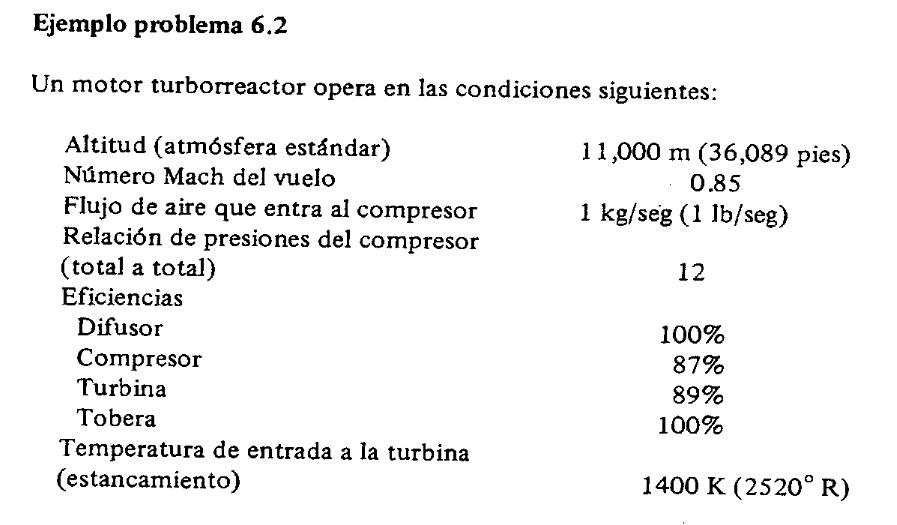

In [2]:
h = 11_000 # Altura a nivel del mar en m
M = 0.85 #N° MACH
MA = 1 # KG/S
RC = 12 # Relación de compresor
#Eficiencias
ND = 1 # Eficiencia de difusor
NC = 0.87 # Eficiencia de compresor
NTUR = 0.89 # Eficiencia de turbina
NTOB = 1 # Eficiencia tobera
T3 = 1400 # °K Temperatura de entrada a la turbina (estancamiento)
U = 0 # SISTEMA INTERNACIONAL
R = 8.3144 # kJ/kmol*k
GC = 1 #
FactorCONV = 1 #BTU a lbf
f = 0 # Relación combustible/aire

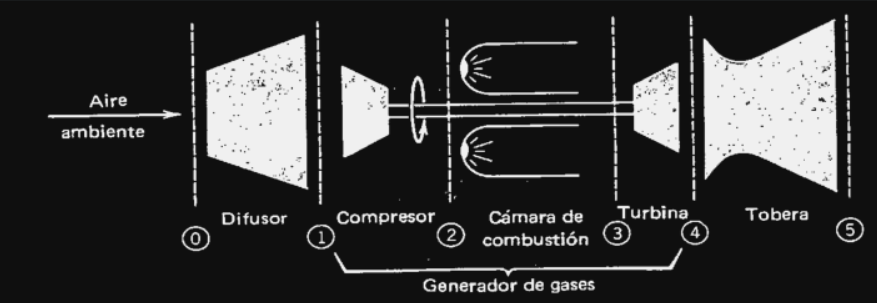

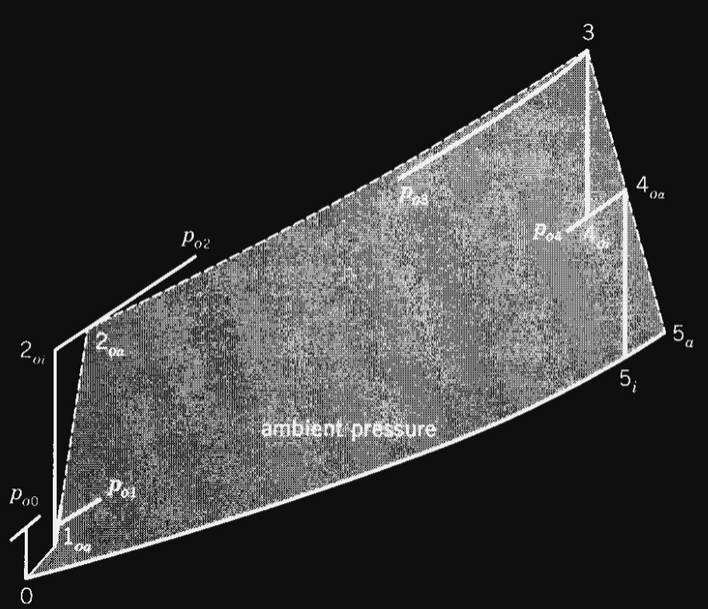

Suponiendo un ciclo de aire estándar, que la presión de estancamiento se mantiene
constante desde la salida del compresor a la entrada de la turbina, y despreciando la
masa de combustible agregada:

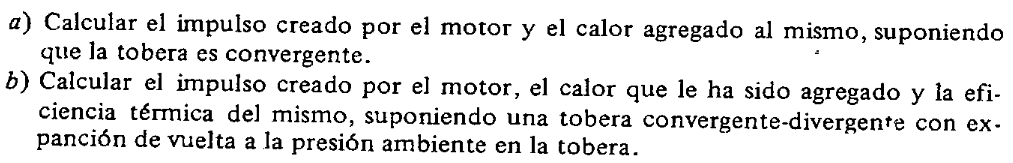

a) Calcular el impulso creado por el motor y el calor agregado al mismo, suponiendo
que la tobera es convergente.

b) Calcular el impulso creado por el motor, el calor que le ha sido agregado y la eficiencia térmica del mismo, suponiendo una tobera convergente-divergente con expansión de vuelta a la presión ambiente en la tobera.

In [3]:
t1,p1=th.ISApropiedades(U,a=h)

In [4]:
t1 # K

In [5]:
p1 # kPa

In [23]:
K = th.valorK(U,t1)
K #Conseguir el valor K

Difusor

In [24]:
th.TemperaturaSI(t1)

,Cp(kJ/kmol*K),h(kJ/kmol),s(kJ/kmol*K),Pr
Temperatura(K),,,,
210.00,29.1450,-2683.300,183.79900,0.398700
216.65,29.1317,-2489.519,184.70074,0.445649
220.00,29.1250,-2391.900,185.15500,0.469300


In [25]:
# VALORES A MODIFICAR
h1 = -2489.519 #kJ/kmol
pr1 = 0.445649 

In [26]:
v1 = M*(K*GC*R*t1*1000/th.aireSecoMol)**(1/2)
v1 #m/s

Ahora con los valores de h1 y v1 se puede conseguir la ht1 que es la entalpia de estancamiento mediante

In [27]:
ht1 = h1 + (v1**2*th.aireSecoMol)/(2*GC*1000)
#kJ/kmol + (m^2/s^2/(2*kg*m/kgf*s^2*kmol/kg))/(m^2/s^2*kJ/kg)
ht1 #kJ/kmol


In [28]:
th.EntalpiaSI(ht1)

,Temperatura(K),Cp(kJ/kmol*K),s(kJ/kmol*K),Pr
h(kJ/kmol),,,,
-1809.700000,240.000000,29.099000,187.688000,0.636400
-1579.628198,247.906247,29.092675,188.626472,0.713723
-1578.504060,247.944878,29.092644,188.631057,0.714101


In [29]:
# VALORES A MODIFICAR
tt1 = 247.906247 #K
pr1 = 0.713723

In [30]:
pt1 = (tt1/t1)**(K/(K-1))*p1
pt1 # Presión de estancamiento 1

# Sacar valores punto 2 ideal (Ent. Cámara de combustión)

In [31]:
pr2i = th.presionRelativa(pr1,rp=RC)
pr2i

In [32]:
th.PresionRelSI(pr2i)

,Temperatura(K),Cp(kJ/kmol*K),h(kJ/kmol),s(kJ/kmol*K)
Pr,,,,
8.439000,500.000000,29.827000,5814.100000,209.178000
8.564676,502.023768,29.838333,5874.529716,209.297605
9.060000,510.000000,29.883000,6112.700000,209.769000


In [33]:
# VALORES A MODIFICAR
tt2i = 502.023768
ht2i = 5874.529716

# Sacar valores reales 2 (Ent. Cámara de combustión)

In [34]:
ht2r = th.eficienciaCompresor(eficCompresor=NC,h1= ht1,h2i= ht2i)
ht2r

In [35]:
th.EntalpiaSI(ht2r)

,Temperatura(K),Cp(kJ/kmol*K),s(kJ/kmol*K),Pr
h(kJ/kmol),,,,
6711.500000,530.00000,30.000000,210.921000,10.407000
6988.369404,539.21976,30.055319,211.438229,11.076355
7011.800000,540.00000,30.060000,211.482000,11.133000


In [36]:
# VALORES A MODIFICAR
tt2r = 539.21976
pr2r = 11.076355

# VALORES NO MODIFICABLES
pt2 = RC*pt1
pt2

# Valores del punto 3 (Ent. Turbina de gas)

In [37]:
th.TemperaturaSI(T3)

,Cp(kJ/kmol*K),h(kJ/kmol),s(kJ/kmol*K),Pr
Temperatura(K),,,,
1390.0,34.683,34771.7,242.006,437.6
1400.0,34.717,35118.8,242.255,450.9
1410.0,34.751,35466.1,242.502,464.5


In [38]:
# VALORES A MODIFICAR
ht3 = 35118.8
pr3 = 450.9

Que la presión de estancamiento se mantiene constante desde la salida del compresor a la entrada de la turbina, y despreciando la masa de combustible agregada

In [39]:
pt3 = pt2
mf = 0

In [40]:
wtgr = ht2r-ht1
wtgr # kJ/kmol

In [41]:
ht4r=ht3-wtgr # Entalpia 4 real
ht4r # kJ/kmol

# Valores del punto 4 real (Ent. Tobera)

In [42]:
th.EntalpiaSI(ht4r)

,Temperatura(K),Cp(kJ/kmol*K),s(kJ/kmol*K),Pr
h(kJ/kmol),,,,
26218.200000,1140.000000,33.705000,235.226000,193.590000
26550.802398,1149.860729,33.748387,235.515905,200.502371
26555.500000,1150.000000,33.749000,235.520000,200.600000


In [43]:
# VALORES A MODIFICAR
tt4r = 1149.860729 # K
pr4r = 200.502371

# Valores del punto 4 ideal (Ent. Tobera)

In [44]:
ht4i = th.eficienciaTurbinaGas(eficTurbinaGas=NTUR, h3=ht3, h4r= ht4r)
ht4i

In [45]:
th.EntalpiaSI(ht4i)

,Temperatura(K),Cp(kJ/kmol*K),s(kJ/kmol*K),Pr
h(kJ/kmol),,,,
25209.100000,1110.000000,33.571000,234.32900,171.790000
25491.836402,1118.417279,33.608878,234.58236,178.868932
25545.000000,1120.000000,33.616000,234.63000,180.200000


In [46]:
# VALORES A MODIFICAR
tt4i = 1118.417279
pr4i = 178.868932

In [47]:
pt4 = pt3*(pr4i/pr3)
pt4 #Kpa

Las condiciones de entrada a la tobera para cualquiera de los motores son las del estado 4ta.

## Tobera convergente

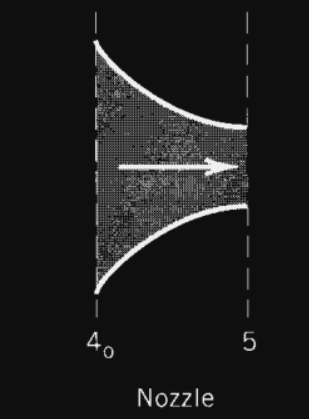

La velocidad en la salida sería sónica, se necesita aproximar la temperatura de salida y su velocidad

In [48]:
f = lambda T5: th.valorK(U,T5)*R*T5 - 2*(ht4r-th.moleculaEntalpia("Aire seco",T5,U))

In [49]:
t5 = t5=th.raizFuncion(f,0.0001,u=U)
t5

4.016572347609326e-06
N° de iteraciones: 29


In [50]:
h5 = th.moleculaEntalpia("aire seco",t5,U)
h5

In [51]:
v5 = ((ht4r-h5)*(2*GC*1000)/th.aireSecoMol)**(1/2)
v5

In [52]:
th.TemperaturaSI(t5)

,Cp(kJ/kmol*K),h(kJ/kmol),s(kJ/kmol*K),Pr
Temperatura(K),,,,
985.675663,32.969649,21071.969857,230.376135,108.053238
985.675665,32.969649,21071.969924,230.376135,108.053239
985.675667,32.969649,21071.969992,230.376135,108.053240


In [53]:
# VALORES A MODIFICAR
# h5 ya fue conseguido anteriormente
pr5 = 108.053239

In [54]:
p5=pt4*(pr5/pr4r)
p5 # kPa

In [55]:
a5 = MA*R*FactorCONV*t5/(p5*v5*th.aireSecoMol)
a5 #m^2

In [56]:
impulsoConv = (p5-p1)*a5*1000+v5-v1
impulsoConv #N

# Tobera convergente-divergente

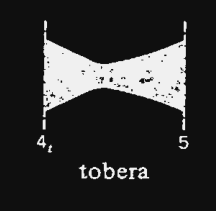

In [57]:
p5=p1 #La presión de salida es igual a la presión de entrada

In [58]:
pr5i = pr4r*(p5/pt4)
pr5i # Presion relativa 5 ideal

In [59]:
th.PresionRelSI(pr5i)

,Temperatura(K),Cp(kJ/kmol*K),h(kJ/kmol),s(kJ/kmol*K)
Pr,,,,
25.932000,680.000000,30.988000,11283.700000,218.512000
26.242076,682.135511,31.002735,11349.943556,218.608739
27.384000,690.000000,31.057000,11593.900000,218.965000


In [60]:
# VALORES A MODIFICAR
h5i = 11349.943556
t5i = 682.135511

In [61]:
v5i = ((ht4r-h5i)*2*GC*1000/th.aireSecoMol)**(1/2)
v5i #m/s^2

In [62]:
impulsoConvDiv = (p5-p1)*a5*1000+v5i-v1
impulsoConvDiv #N

# Eficiencia térmica

In [63]:
qent = ht3-ht2r
qent #kJ/kmol

In [64]:
nt = (v5i**2-v1**2)/(2*GC*qent*1000/th.aireSecoMol)
nt